# Data Cleaning, analyzing, visualizing - Netflix Movies and TV Shows

data source: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
original_df = pd.read_csv('netflix_titles.csv')
original_df.shape

(8807, 12)

In [3]:
pd.set_option('display.max_columns', 13)

In [4]:
original_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 將‘導演’欄為NaN的列去除

In [6]:
# drop NaN values in column 'direactor'
df = original_df.copy()
df.dropna(axis = 'rows', how = 'all', subset = 'director', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6173 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6173 non-null   object
 1   type          6173 non-null   object
 2   title         6173 non-null   object
 3   director      6173 non-null   object
 4   cast          5700 non-null   object
 5   country       5751 non-null   object
 6   date_added    6173 non-null   object
 7   release_year  6173 non-null   int64 
 8   rating        6172 non-null   object
 9   duration      6170 non-null   object
 10  listed_in     6173 non-null   object
 11  description   6173 non-null   object
dtypes: int64(1), object(11)
memory usage: 626.9+ KB


In [7]:
# Dividing into two groups: movie and tv show
print(df['type'].unique())

type_groups = df.groupby('type')
moive_type = type_groups.get_group('Movie')
tvshow_type = type_groups.get_group('TV Show')

['Movie' 'TV Show']


### 種類(Genre)數量前五排名

In [8]:
# column 'listed_in'

#movie
from collections import Counter

movie_listed_counter = Counter()
for x in moive_type['listed_in']:
    movie_listed_counter.update(x.split(', '))

movie_listed_df = pd.DataFrame.from_dict(movie_listed_counter, orient='index')
movie_listed_df.sort_values(by = [0], ascending = False, inplace = True)
movie_listed_df.reset_index(inplace = True)
movie_listed_df.rename(columns = {'index':'genre', 0 : 'count'}, inplace = True)


#TV show
tvshow_listed_counter = Counter()
for x in tvshow_type['listed_in']:
    tvshow_listed_counter.update(x.split(', '))

tvshow_listed_df = pd.DataFrame.from_dict(tvshow_listed_counter, orient='index')
tvshow_listed_df.sort_values(by = [0], ascending = False, inplace = True)
tvshow_listed_df.reset_index(inplace = True)
tvshow_listed_df.rename(columns = {'index':'genre', 0 : 'count'}, inplace = True)

Text(0.5, 0.98, 'Top 5 Genre in Netflix')

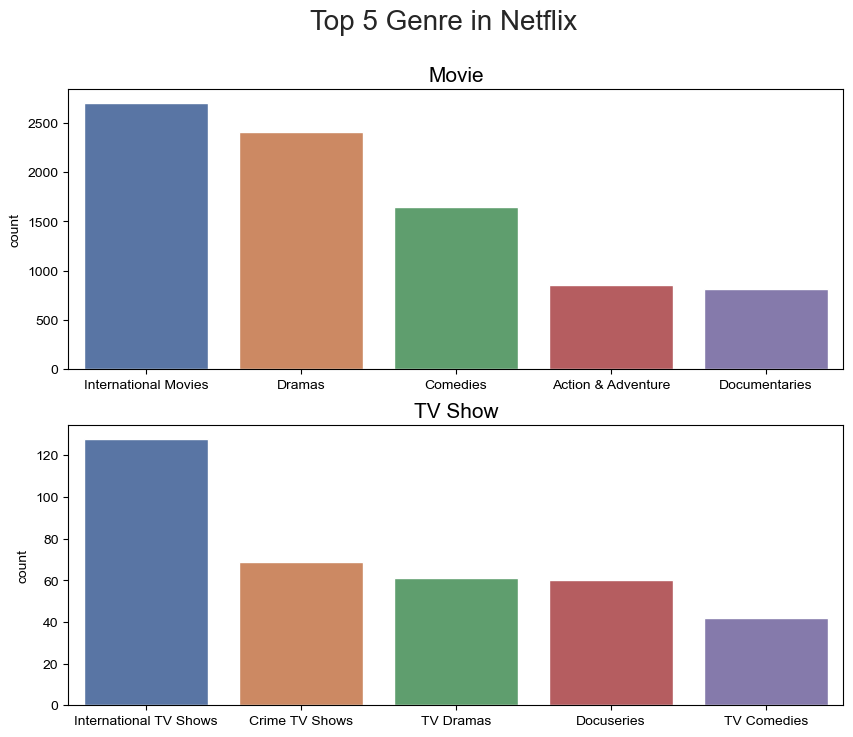

In [9]:
fig, axes = plt.subplots(2, 1, figsize = (10,8))
sns.set_theme()

sns.barplot(ax = axes[0], data = movie_listed_df, x = movie_listed_df['genre'][:5], y = 'count')
axes[0].set_xlabel(None)
axes[0].set_title('Movie', fontdict = {'fontsize': 15})

sns.barplot(ax = axes[1], data = tvshow_listed_df, x = tvshow_listed_df['genre'][:5], y = 'count')
axes[1].set_xlabel(None)
axes[1].set_title('TV Show', fontdict = {'fontsize': 15})

fig.suptitle('Top 5 Genre in Netflix', fontsize = 20)

### 時間長度與集數統計

In [10]:
# duration

#movie
movie_length_dict = {'less than 60 mins': 0,
                        '60 to 90 mins': 0,
                        '90 to 120 mins': 0,
                        'greater than 120 mins': 0}


temp_df = moive_type[moive_type['duration'].notnull()] # To deal with NaN

for x in temp_df['duration']:
    x = x.split(' ')[0]
    if int(x) < 60:
        movie_length_dict['less than 60 mins'] += 1
    elif 90 >= int(x) >= 60:
        movie_length_dict['60 to 90 mins'] += 1
    elif 120 >= int(x) > 90:
        movie_length_dict['90 to 120 mins'] += 1
    elif int(x) > 120:
        movie_length_dict['greater than 120 mins'] += 1


#TV show
tvshow_length_dict = {'0 ~ 3 season(s)': 0,
                        '3 ~ 5 seasons': 0,
                        '6 ~ 9 seasons': 0,
                        '10+ seasons': 0}


temp_df = tvshow_type[tvshow_type['duration'].notnull()] # To deal with NaN

for x in temp_df['duration']:
    x = x.split(' ')[0]
    if int(x) <= 3:
        tvshow_length_dict['0 ~ 3 season(s)'] += 1
    elif 5 >= int(x) > 3:
        tvshow_length_dict['3 ~ 5 seasons'] += 1
    elif 9 >= int(x) > 5:
        tvshow_length_dict['6 ~ 9 seasons'] += 1
    elif int(x) >= 10:
        tvshow_length_dict['10+ seasons'] += 1


movie_length_df = pd.DataFrame(movie_length_dict, index = ['n']).T
tvshow_length_df = pd.DataFrame(tvshow_length_dict, index = ['n']).T

Text(0.5, 0.98, 'Length Difference in Netflix')

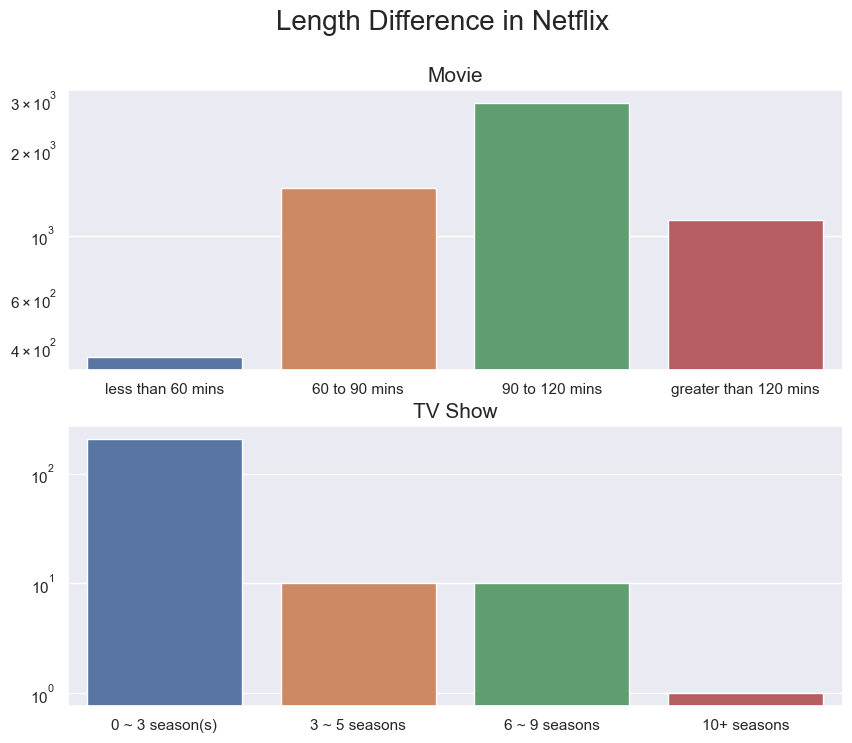

In [11]:
fig, axes = plt.subplots(2, 1, figsize = (10,8))
sns.set_theme()

g = sns.barplot(ax = axes[0], data = movie_length_df, x = movie_length_df.index, y = movie_length_df['n'])
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title('Movie', fontdict = {'fontsize': 15})
g.set_yscale("log")


g = sns.barplot(ax = axes[1], data = tvshow_length_df, x = tvshow_length_df.index, y = tvshow_length_df['n'])
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].set_title('TV Show', fontdict = {'fontsize': 15})
g.set_yscale("log")

fig.suptitle('Length Difference in Netflix', fontsize = 20)

### 分級(Rating)分佈

In [12]:
# column 'rating'

#movie
print(moive_type['rating'].unique())

A = moive_type['rating'].isin(['74 min', '84 min', '66 min', np.nan])
cleaned_rating_movie_df = moive_type[~A]

for index, row in cleaned_rating_movie_df.iterrows():
    if row['rating'] == 'PG':
        cleaned_rating_movie_df.at[index, 'rating'] = 'TV-PG'
    elif row['rating'] == 'G':
        cleaned_rating_movie_df.at[index, 'rating'] = 'TV-G'
    else:
        pass


#TV show
print(tvshow_type['rating'].unique())

['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'TV-Y7-FV' 'UR' nan]
['TV-MA' 'TV-14' 'TV-Y' 'TV-G' 'TV-PG' 'TV-Y7' 'R']


In [13]:
rating_order = ['TV-G' , 'TV-Y' , 'TV-G' , 'TV-PG' , 'TV-Y7' , 'TV-Y7-FV' , 'PG-13' , 'TV-14' , 'R' , 'NC-17' ,'TV-MA']
movie_rating = cleaned_rating_movie_df['rating'].value_counts()[rating_order]

rating_order = ['TV-G' , 'TV-Y' , 'TV-G' , 'TV-PG' , 'TV-Y7' , 'TV-14' , 'R' ,'TV-MA']
tv_rating = tvshow_type['rating'].value_counts()[rating_order]

In [14]:
def rating_barplot(data , title , height ,h_lim = None):
    fig , ax = plt.subplots(1,1, figsize = (20,7))
    if h_lim:
        ax.set_ylim(0,h_lim)
    ax.bar(data.index , data , color = '#d0d0d0' , width = 0.6 , edgecolor = 'black')
    
    color = ['green' , 'blue' , 'orange' , 'red']
    span_range = [[0,2] , [3,6] , [7,8] , [9,11]]
    
    for idx , sub_title in enumerate(['Little Kids' , 'Older Kids' , 'Teens' , 'Mature']):
        ax.annotate(sub_title , 
                   xy = (sum(span_range[idx])/2 ,height),
                   xytext = (0,0) , textcoords = 'offset points',
                   va = 'center' , ha = 'center',
                   color = 'w' , fontsize = 16 , fontweight = 'bold',
                   bbox = dict(boxstyle = 'round4' , pad = 0.4 , color = color[idx] , alpha = 0.6))
        ax.axvspan(span_range[idx][0]-0.4 , span_range[idx][1]+0.4 , color = color[idx], alpha = 0.1)
    ax.set_title(f'Distribution of {title} Rating',fontsize = 20 , fontweight = 'bold' , position = (0.5, 1.0 + 0.03))
    plt.show()

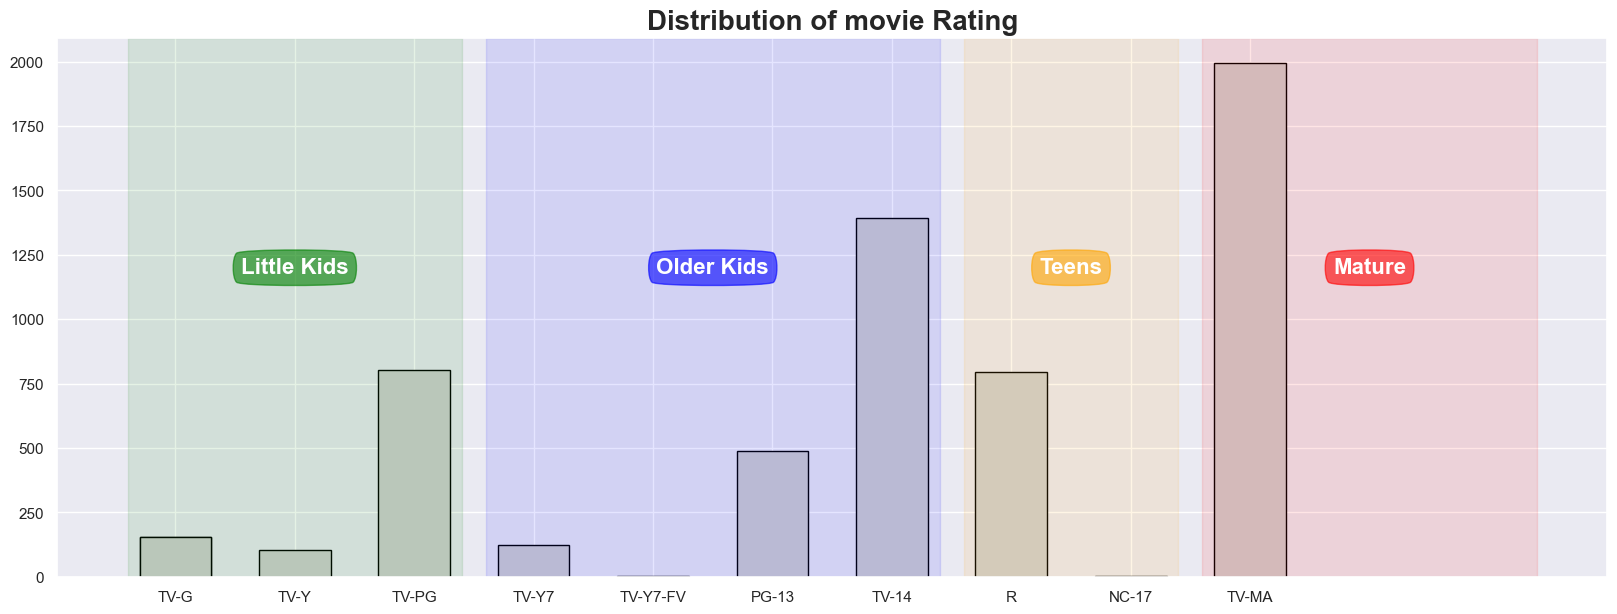

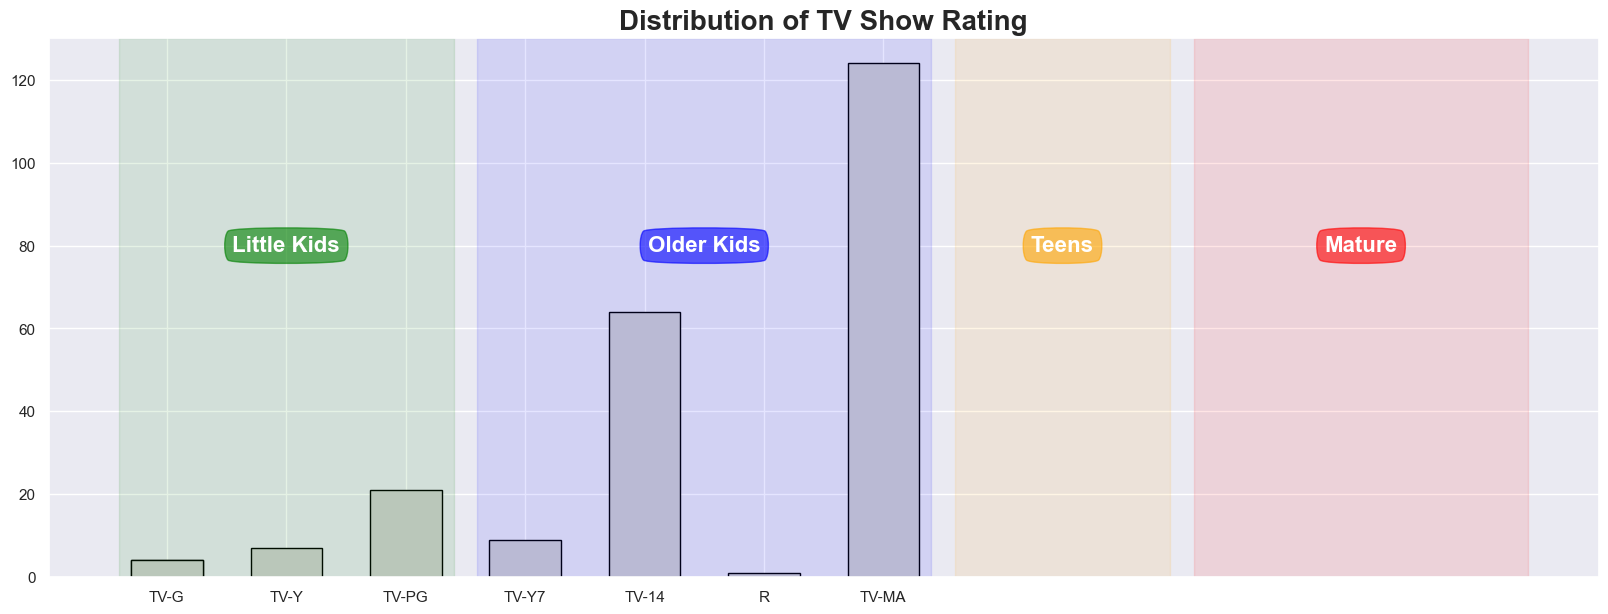

In [15]:
rating_barplot(movie_rating , "movie" , 1200)
rating_barplot(tv_rating , 'TV Show' , 80)

### 導演與演員組合合作次數

In [16]:
# director vs cast

director_vs_cast_df = df[~df['cast'].isna()]
director_vs_cast_df['cast'].isna().value_counts()

False    5700
Name: cast, dtype: int64

In [17]:
all_dict = {}

for index, row in director_vs_cast_df.iterrows():
    if row['director'] not in all_dict.keys():
        all_dict[row['director']] = {}
    else:
        pass

    for cast in row['cast'].split(','):
        cast = cast.strip()

        if cast not in all_dict[row['director']].keys():
            all_dict[row['director']][cast] = 1
        
        else:
            all_dict[row['director']][cast] += 1


directorr = []
castt = []
timess = []

for x in all_dict.keys():
    for y in all_dict[x].keys():
        directorr.append(x)
        castt.append(y)
        timess.append(int(all_dict[x][y]))

            
D_vs_C_times_df = pd.DataFrame({'director': directorr, 'actor': castt, 'times': timess})
D_vs_C_times_df.sort_values(by = 'times', ascending = False, inplace = True)

D_vs_C_times_df['rank'] = range(len(D_vs_C_times_df))
D_vs_C_times_df = D_vs_C_times_df.set_index('rank')
D_vs_C_times_df.head(10)

,director,actor,times
rank,,,
0,Rajiv Chilaka,Julie Tejwani,17
1,Rajiv Chilaka,Jigna Bhardwaj,17
2,Rajiv Chilaka,Rajesh Kava,17
3,Rajiv Chilaka,Rupa Bhimani,16
4,Rajiv Chilaka,Vatsal Dubey,15
5,Rajiv Chilaka,Swapnil,12
6,Rajiv Chilaka,Mousam,12
7,Suhas Kadav,Saurav Chakraborty,8
8,S.S. Rajamouli,Ramya Krishnan,7


### 導演最常拍攝的題材主題(按次數排名)

In [18]:
# director vs listed in
all_dict = {}

for index, row in df.iterrows():
    if row['director'] not in all_dict.keys():
        all_dict[row['director']] = {}
    else:
        pass

    for genre in row['listed_in'].split(','):
        genre = genre.strip()

        if genre not in all_dict[row['director']].keys():
            all_dict[row['director']][genre] = 1
        
        else:
            all_dict[row['director']][genre] += 1


directorrr = []
genreer = []
timesss = []

for x in all_dict.keys():
    for y in all_dict[x].keys():
        directorrr.append(x)
        genreer.append(y)
        timesss.append(int(all_dict[x][y]))

            
D_vs_Genre_times_df = pd.DataFrame({'director': directorrr, 'genre': genreer, 'times': timesss})
D_vs_Genre_times_df.sort_values(by = 'times', ascending = False, inplace = True)

D_vs_Genre_times_df['index'] = range(len(D_vs_Genre_times_df))
D_vs_Genre_times_df = D_vs_Genre_times_df.set_index('index')
D_vs_Genre_times_df.head(10)



,director,genre,times
index,,,
0,Rajiv Chilaka,Children & Family Movies,19
1,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
2,Suhas Kadav,Children & Family Movies,16
3,Marcus Raboy,Stand-Up Comedy,15
4,Cathy Garcia-Molina,International Movies,13
5,Jay Karas,Stand-Up Comedy,13
6,Jay Chapman,Stand-Up Comedy,12
7,Youssef Chahine,Dramas,12
8,Youssef Chahine,International Movies,10


### 影視作品製作地點

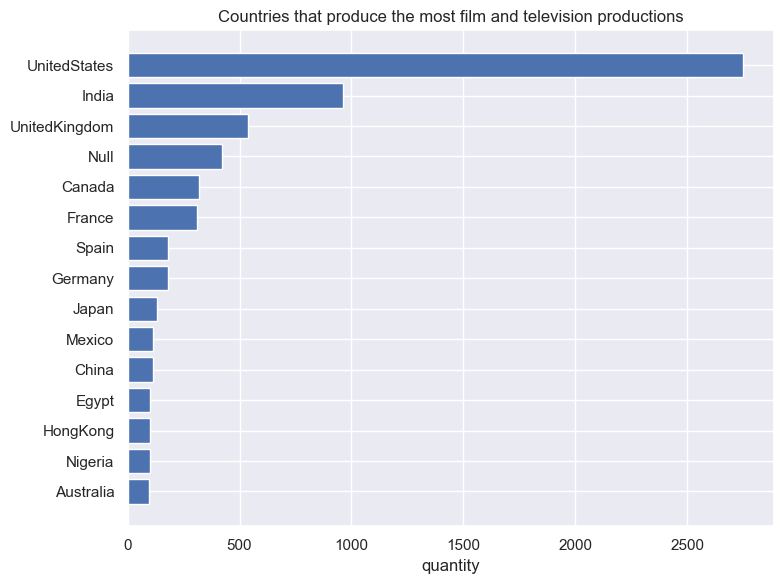

In [19]:
plt.figure(figsize=(8, 6))

country_data = df['country'].fillna('Null')
country_count = Counter()

country_dict = dict(Counter(','.join(country_data).replace(' ', '').split(',')))

country_series = pd.Series(country_dict).sort_values(ascending = False)

countries = []
num = []

for key, value in dict(country_series[:15]).items():
    countries.append(key)
    num.append(value)

countries.reverse()
num.reverse()

plt.barh(countries, num)
plt.xlabel('quantity')
plt.title("Countries that produce the most film and television productions")
plt.tight_layout()
plt.show()

### Movie vs TV Show 時間推移圖(2010~2021)

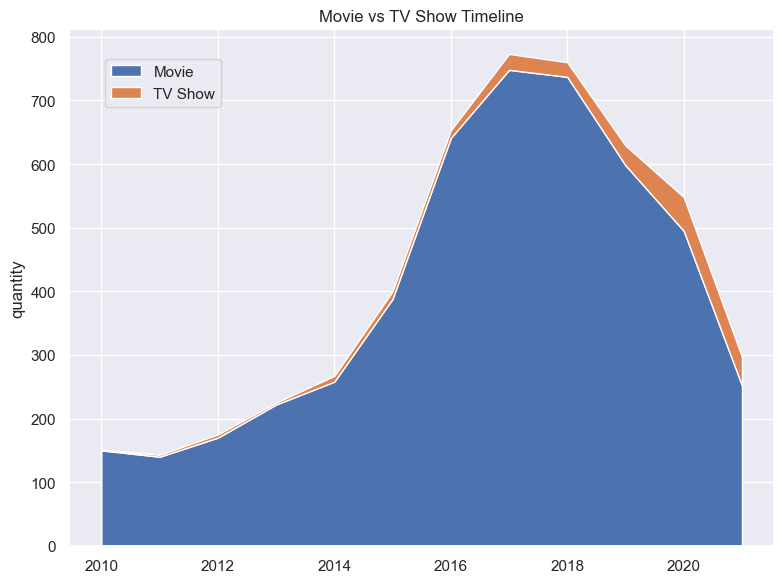

In [20]:
plt.figure(figsize=(8, 6))

years = list(range(2010, 2022))
movie_timeline = list(df['type'].groupby(df[(df['type'] == 'Movie') & (df['release_year'] >= 2010)]['release_year']).agg('count'))
tvshow_timeline = list(df['type'].groupby(df[(df['type'] == 'TV Show') & (df['release_year'] >= 2010)]['release_year']).agg('count'))
labels = ['Movie', 'TV Show']

plt.stackplot(years, movie_timeline, tvshow_timeline, labels = labels, colors = None)
plt.legend(loc = (0.05, .85))

plt.ylabel('quantity')
plt.title("Movie vs TV Show Timeline")
plt.tight_layout()
plt.show()

### 簡介關鍵字排行

In [21]:
# keywords
df.index = range(len(df))
KD = []

for num in df.index:

   kd =  [x for x in df.loc[num, 'description'].split(' ') if len(x) > 5]
   KD.append(kd)

df['keywords'] = KD
df['keywords'].head()


KD_counter = Counter()
for x in df['keywords']:
   KD_counter.update(x)

keywords_series = pd.Series(dict(KD_counter)).sort_values(ascending = False)

keywords = list(keywords_series.index[:10])
keywords_count = list(keywords_series[:10])

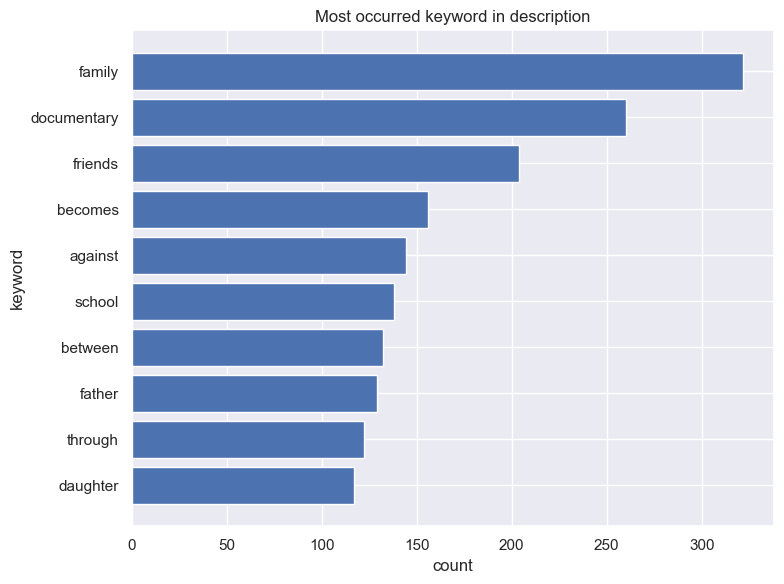

In [22]:
plt.figure(figsize=(8, 6))

keywords = list(keywords_series.index[:10])
keywords_count = list(keywords_series[:10])

keywords.reverse()
keywords_count.reverse()

plt.barh(keywords, keywords_count)

plt.ylabel('keyword')
plt.xlabel('count')
plt.title("Most occurred keyword in description")
plt.tight_layout()
plt.show()